___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from numpy.random import uniform


from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.utils import class_weight
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, make_scorer, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score, precision_recall_curve
from scikitplot.metrics import plot_roc, plot_precision_recall, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


from deepchecks.tabular.suites import data_integrity
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import train_test_validation
from deepchecks.tabular.suites import model_evaluation


import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from scikeras.wrappers import KerasClassifier

import pickle

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)
%matplotlib inline

In [3]:
SEED = 101

In [4]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [5]:
tf.keras.utils.set_random_seed(SEED)

In [6]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train) 
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [7]:
def eval_metric_d(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train) >= 0.5
    y_pred = model.predict(X_test) >= 0.5

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [8]:
df = pd.read_csv("creditcard.csv")

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.shape

(284807, 31)

In [13]:
df.duplicated().sum()

1081

In [139]:
df.isna().sum().sum()

0

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [454]:
ds = Dataset(df, label= 'Class', cat_features=[])

In [19]:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)

In [20]:
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_JOQ5U387CPZ84LX8SZPXK02D1">Data Integrity Sui…

### Exploratory Data Analysis

In [14]:
df.duplicated().sum()

1081

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.duplicated().sum()

0

In [24]:
print('Not Fraud', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
# The dataset is highly unbalanced, the positive class which means frauds is  0.17% of all transactions. Most of the transactions are non-fraud

Not Fraud 99.83 % of the dataset
Fraud 0.17 % of the dataset


In [25]:
df.columns
# Most of the columns have no clear name meaning, so we can't decide which is more related.

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'], dtype='object')

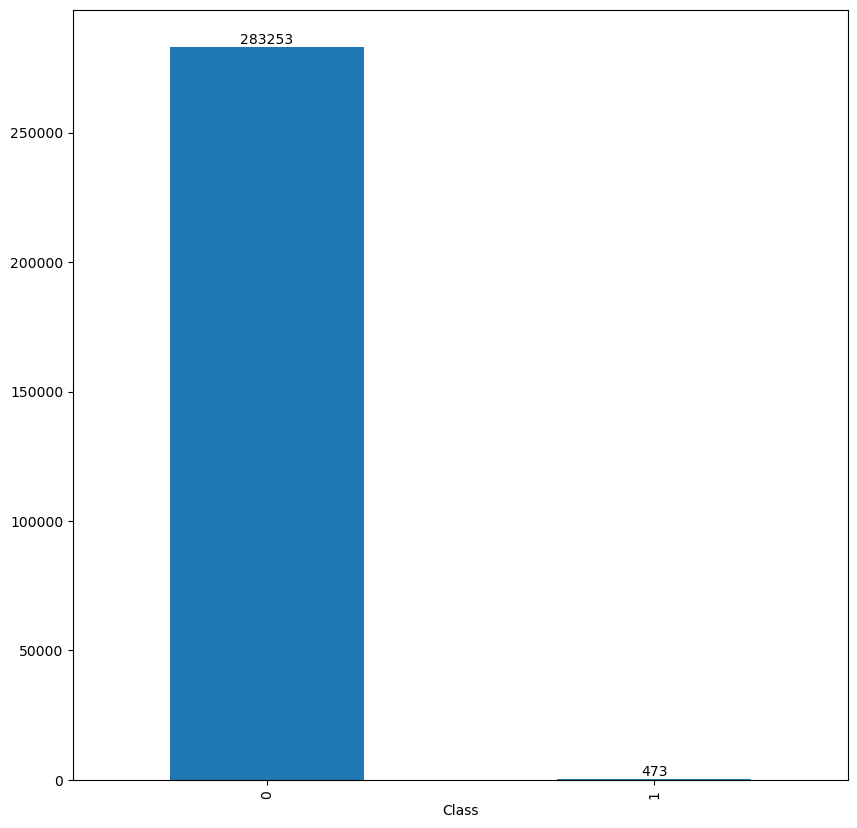

In [26]:
# This bar graph shows us the huge difference between non-fraud and fraud values.
value_counts = df['Class'].value_counts()

ax = value_counts.plot(kind="bar", figsize=(10, 10))

# Adding annotations
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

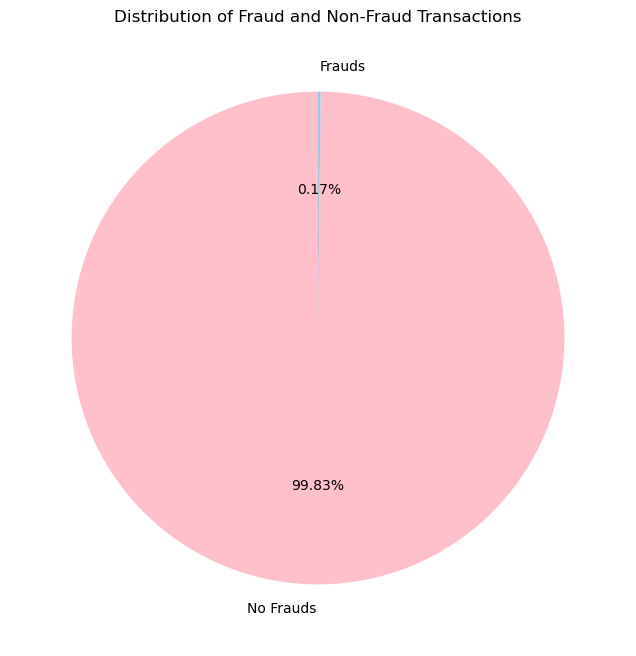

In [27]:
fraud_counts = df['Class'].value_counts()
labels = ['No Frauds', 'Frauds']
colors = ['pink', 'skyblue']

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()

In [ ]:
# if we use this highly unbalanced data frame for our predictive models and analysis,
# we will probably overfit since it will "assume" that most transactions are not fraud.
# it will be difficult for our model to detect patterns that give signs of fraud.

In [28]:
df_f = df[df["Class"] == 1]
df_nf = df[df["Class"] == 0]

In [29]:
pd.concat([df_f.Amount.describe(), df_nf.Amount.describe()], axis=1)

,Amount,Amount
count,473.000000,283253.000000
mean,123.871860,88.413575
std,260.211041,250.379023
min,0.000000,0.000000
25%,1.000000,5.670000
50%,9.820000,22.000000
75%,105.890000,77.460000
max,2125.870000,25691.160000


In [ ]:
# The average transaction amount for fraud is 123.871860, with a minimum amount of 0.0 and a maximum amount of 2125.870000.
# The average transaction amount for non-fraud is 88.413575, with a minimum amount of 0.0 and a maximum amount of 25691.160000.

In [30]:
pd.concat([df_f.Time.describe(), df_nf.Time.describe()], axis=1)

,Time,Time
count,473.000000,283253.000000
mean,80450.513742,94835.058093
std,48636.179973,47475.550607
min,406.000000,0.000000
25%,41203.000000,54233.000000
50%,73408.000000,84711.000000
75%,129095.000000,139308.000000
max,170348.000000,172792.000000


In [ ]:
# On average, credit card transactions is happening at every 80,450.5 seconds for fraud.
# On average, credit card transactions happen every 94,835 seconds for non-fraud.

Text(0.5, 1.0, 'Credit Card Transactions Time Density Plot')

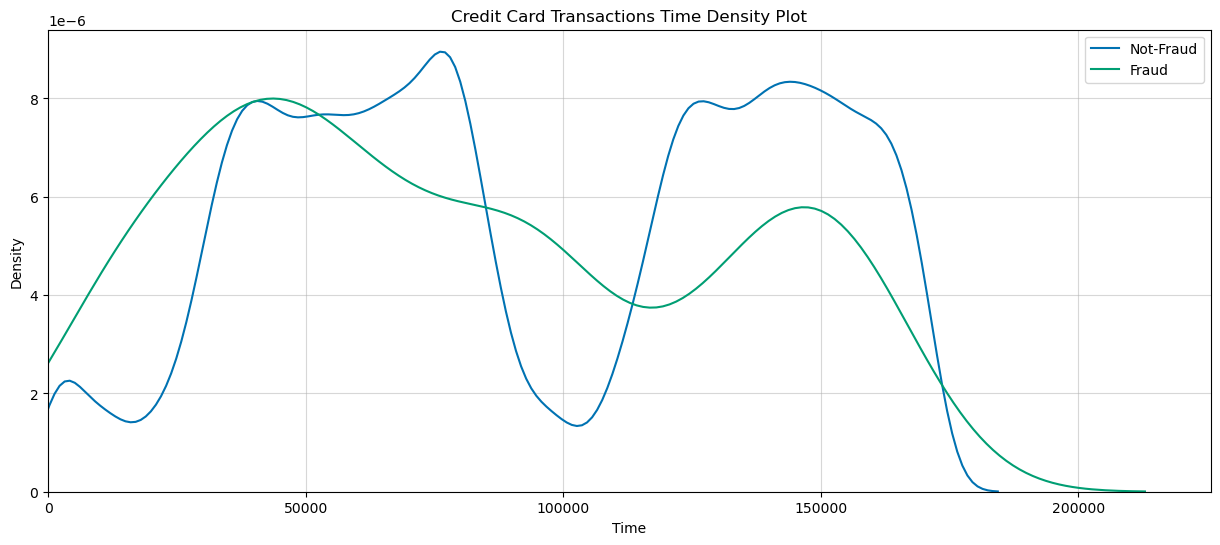

In [31]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_nf['Time'], label = 'Not-Fraud')
sns.kdeplot(df_f['Time'], label = 'Fraud')
plt.xlabel('Time')
plt.xlim(left=0)
plt.legend()
plt.ylabel('Density')
plt.title('Credit Card Transactions Time Density Plot')

In [ ]:
# fraud transactions have a distribution more even than non fraud transactions 

Text(0.5, 1.0, 'Credit Card Transactions Amount Density Plot')

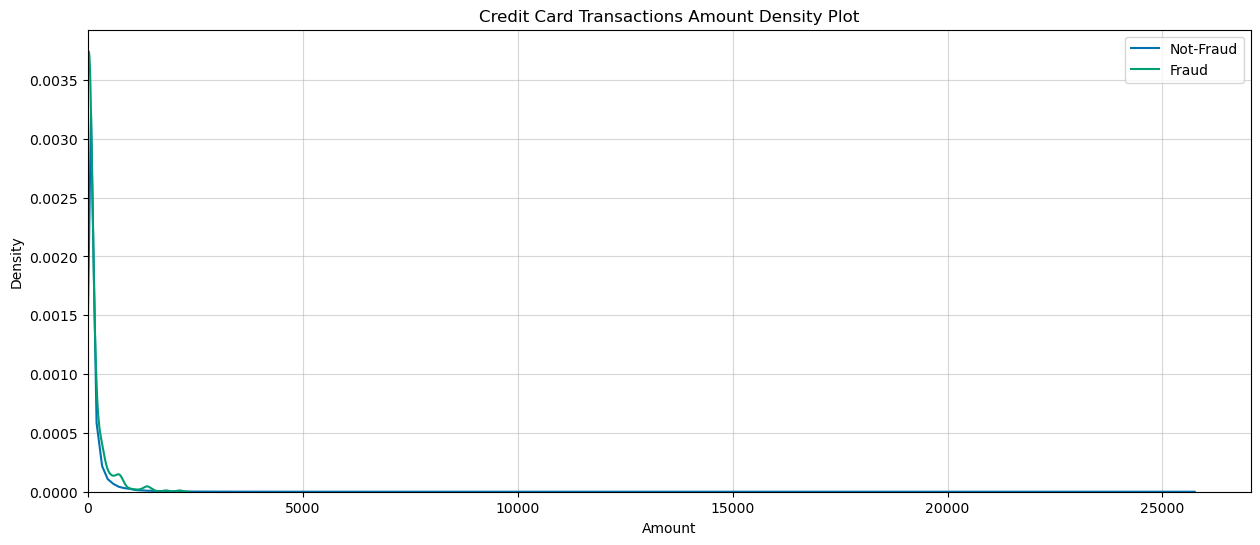

In [32]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_nf['Amount'], label = 'Not-Fraud')
sns.kdeplot(df_f['Amount'], label = 'Fraud')
plt.xlabel('Amount')
plt.xlim(left=0)
plt.legend()
plt.ylabel('Density')
plt.title('Credit Card Transactions Amount Density Plot')

In [ ]:
# Most of the transactions are not expensive and they are between 0 and 5000.

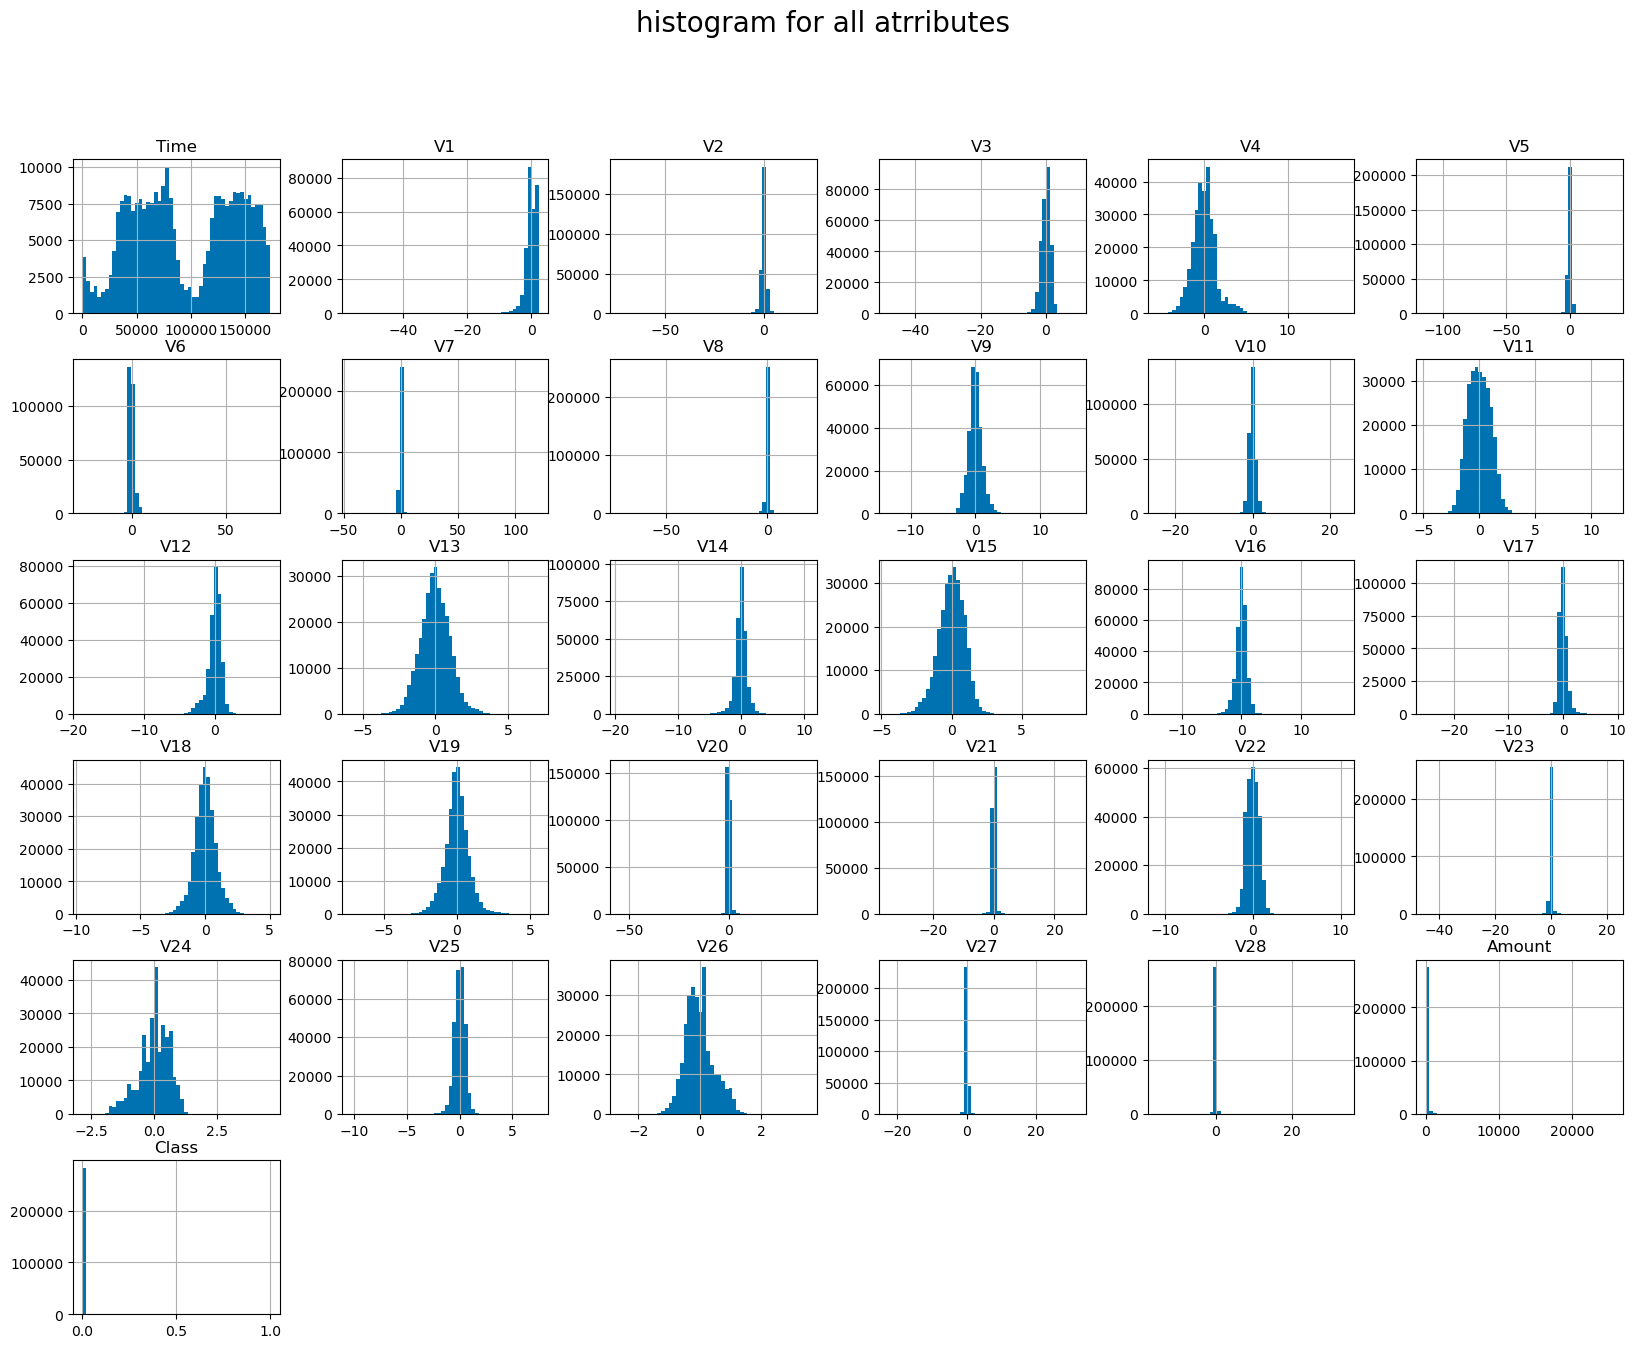

In [33]:
df.hist(bins=50,figsize=(20,15))
plt.suptitle('histogram for all atrributes', fontsize=20)
plt.show()

<Figure size 640x480 with 0 Axes>

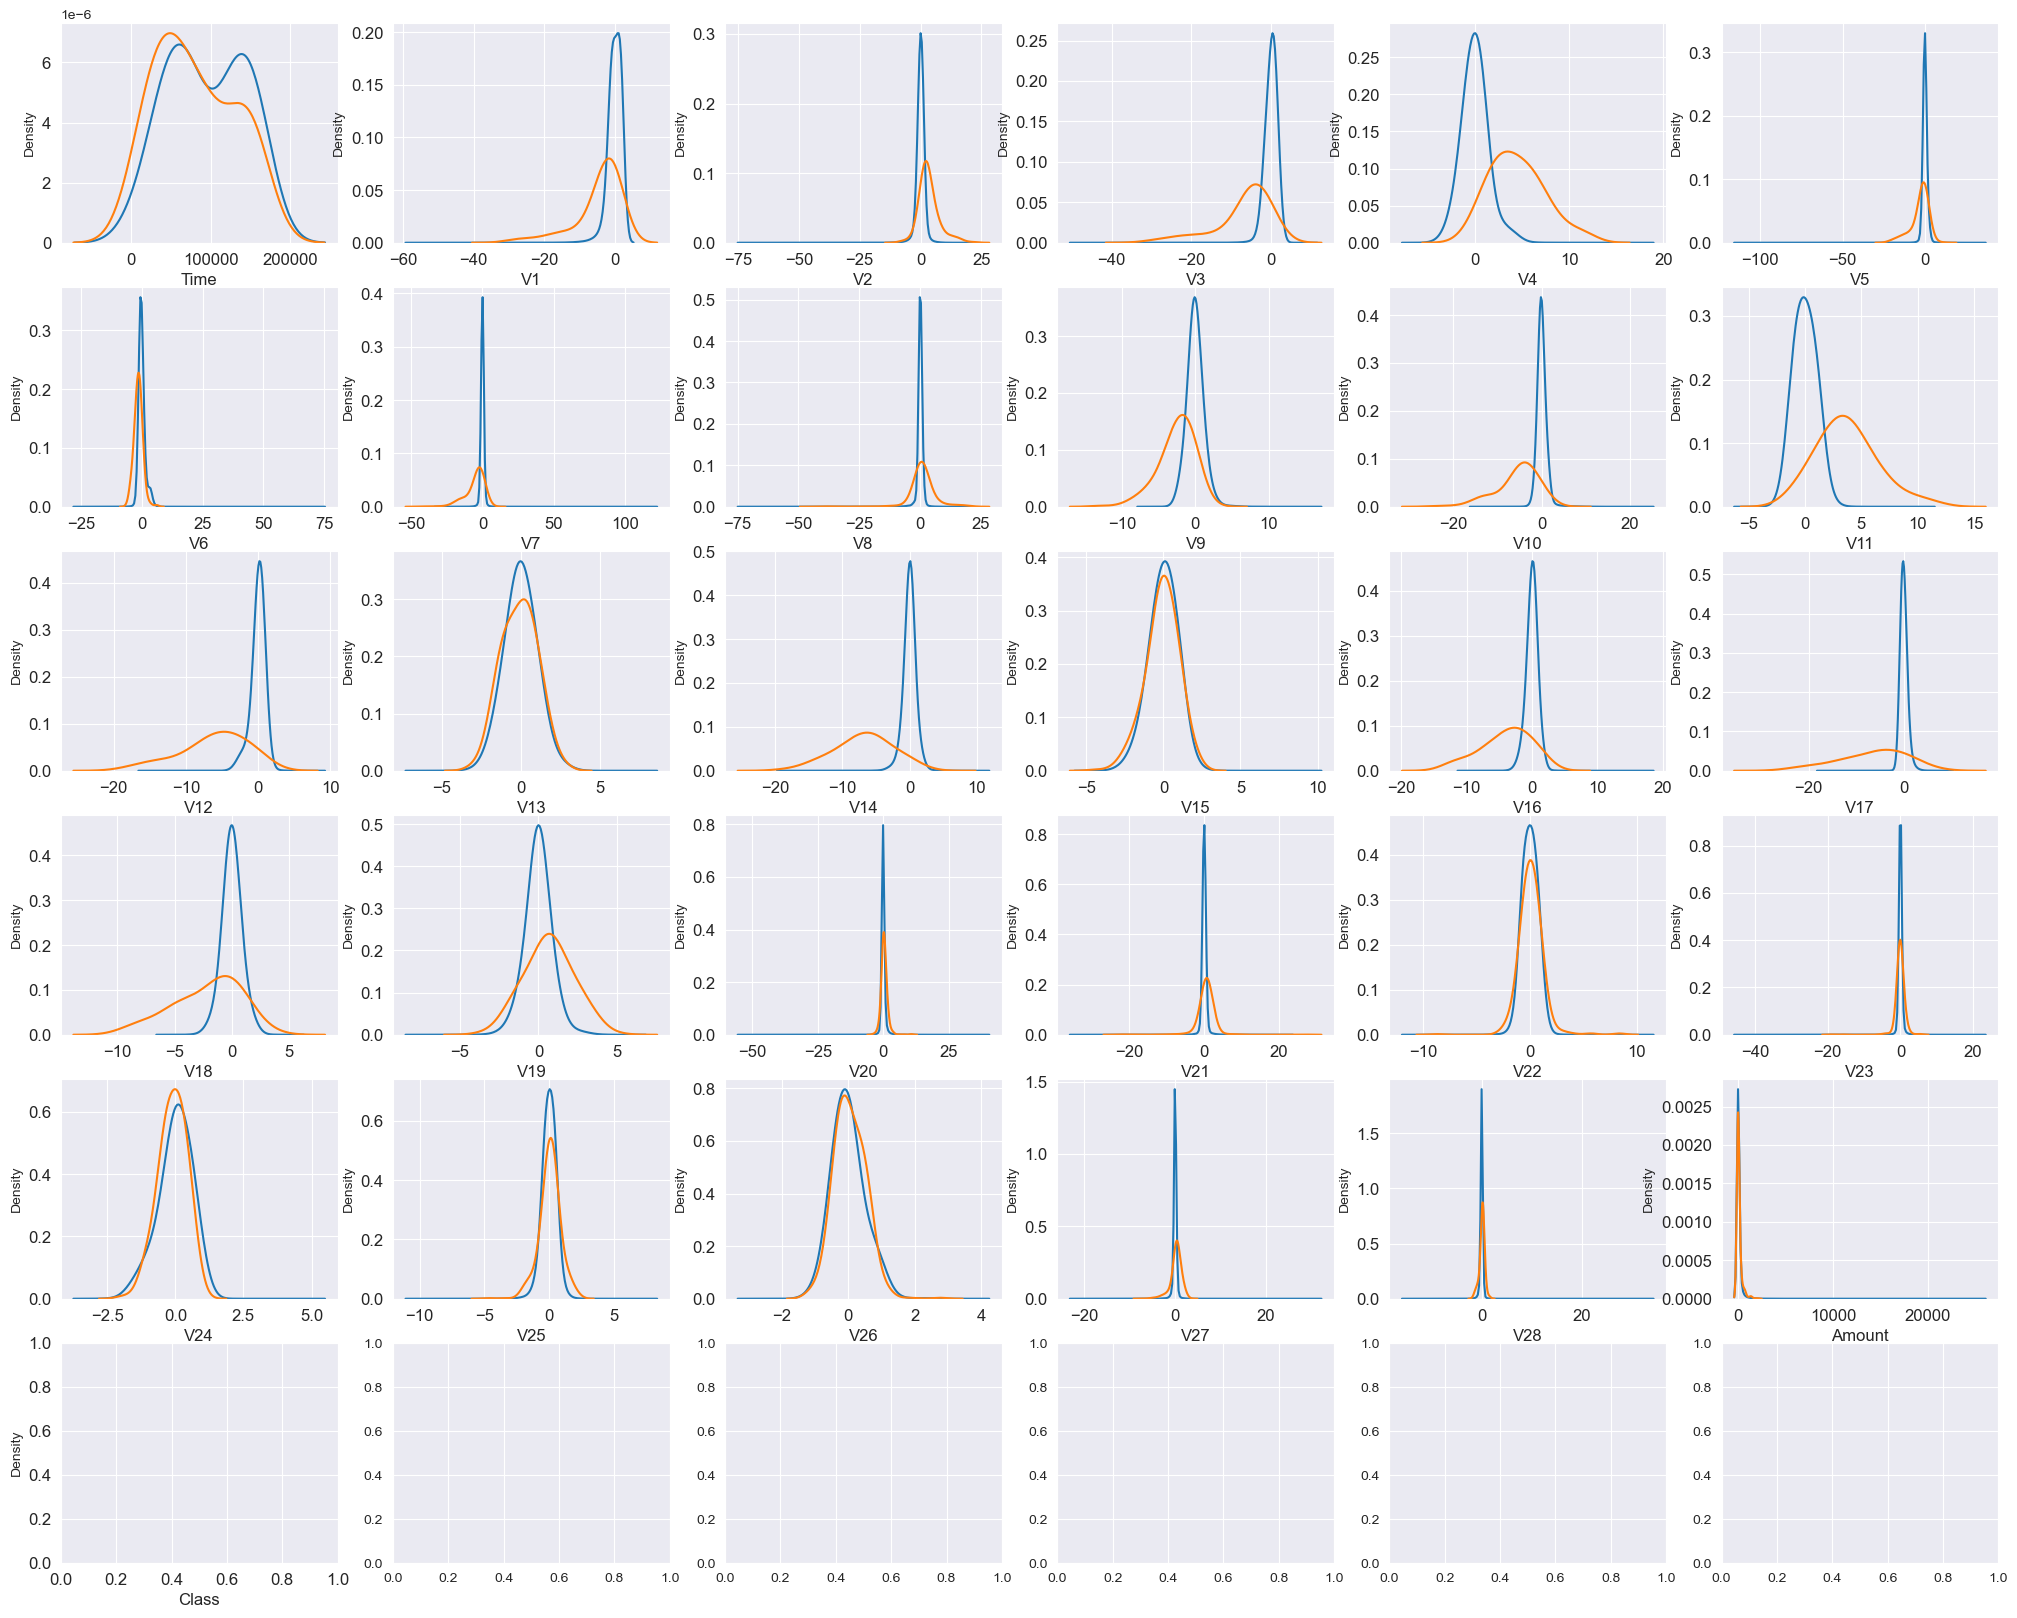

In [127]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(6,6,figsize=(25,20))

for feature in var:
    i += 1
    plt.subplot(6,6,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0",palette = 'YlGnBu')
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

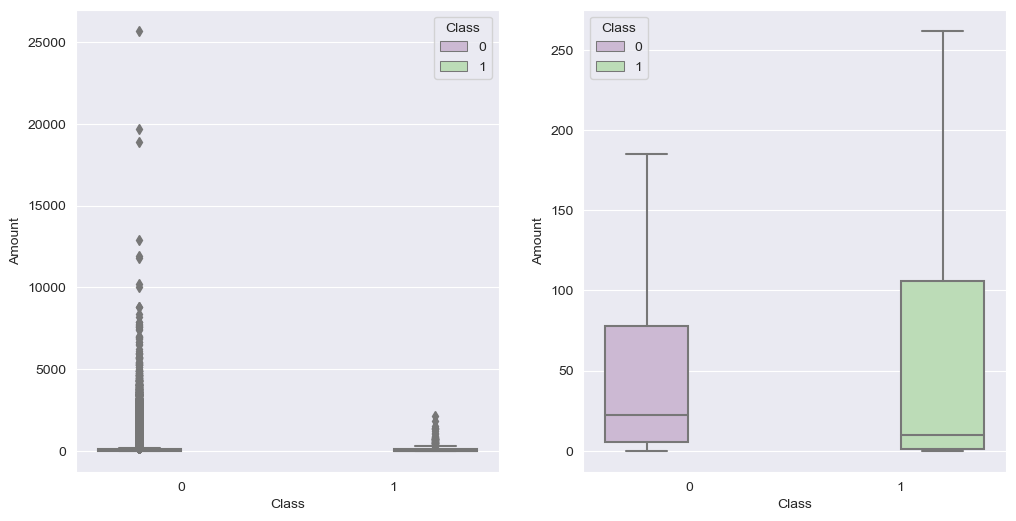

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

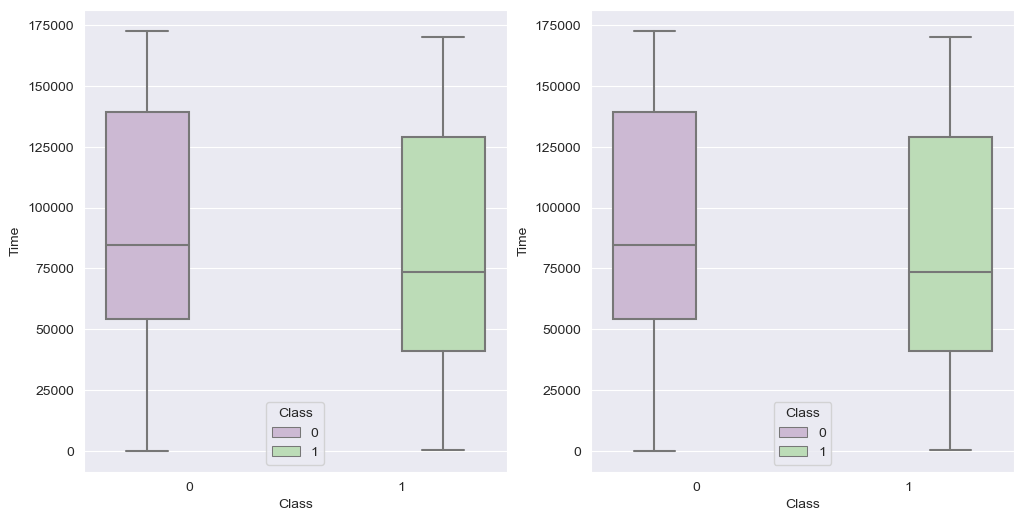

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Time", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Time", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

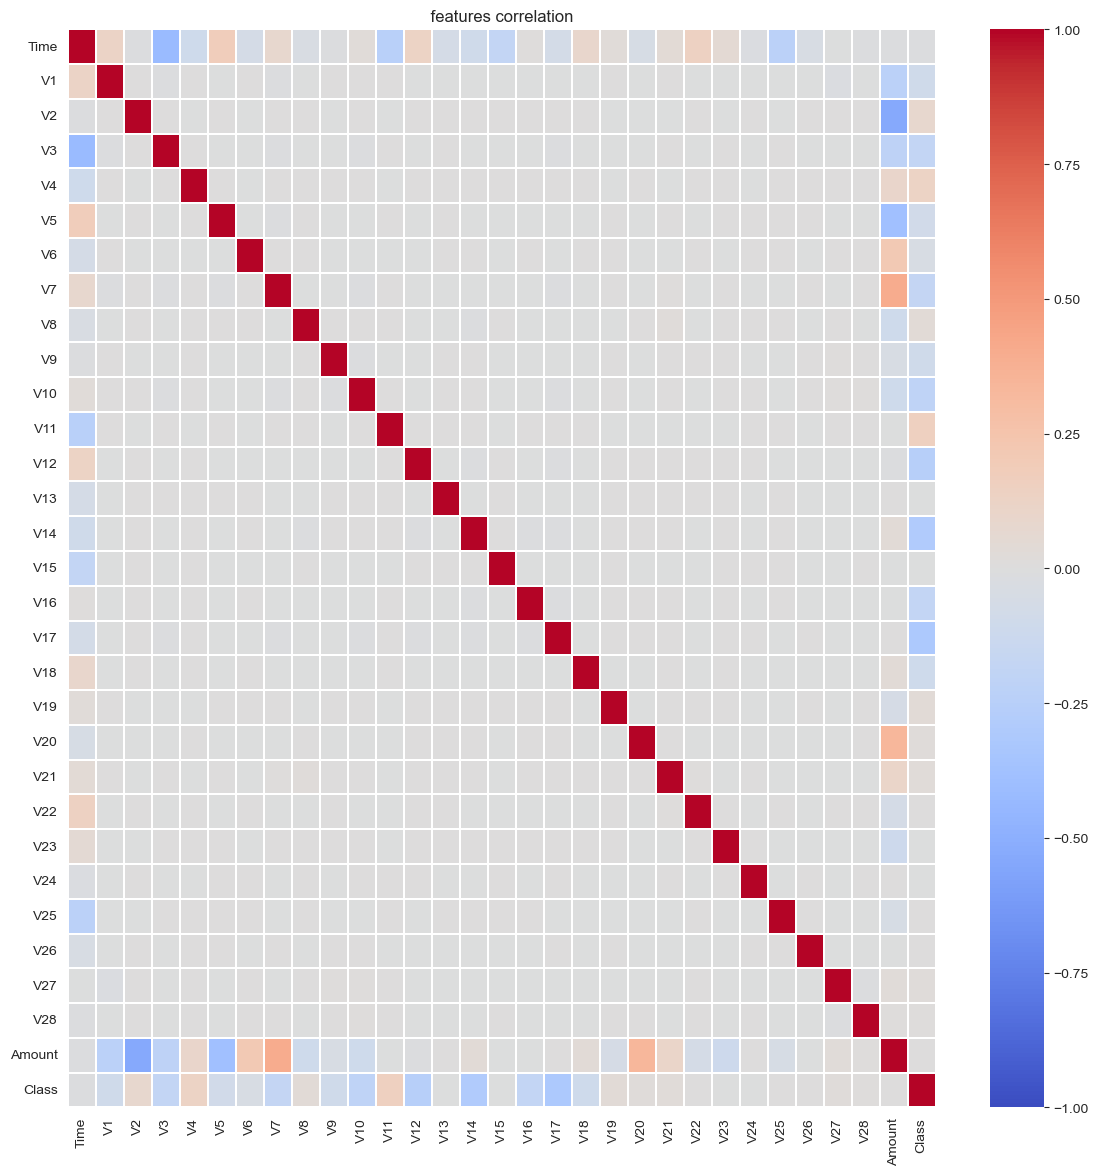

In [37]:
plt.figure(figsize = (14,14))
plt.title(' features correlation ')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1 , cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

In [ ]:
# Class has a positive correlation with v11, v4. 
# # Class has a negative correlation with v17, v14. 
# # class seems to not have a direct correlation with the time and the amount

In [38]:
correlation = df.corr()["Class"]


# Sort the correlation in ascending order
sorted_correlation = correlation.abs().sort_values(ascending=False)

# Print the sorted correlation
print("Sorted correlation in ascending order:")
print(sorted_correlation)

Sorted correlation in ascending order:
Class     1.000000
V17       0.313498
V14       0.293375
V12       0.250711
V10       0.206971
V16       0.187186
V3        0.182322
V7        0.172347
V11       0.149067
V4        0.129326
V18       0.105340
V1        0.094486
V9        0.094021
V5        0.087812
V2        0.084624
V6        0.043915
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
Time      0.012359
V28       0.009682
V24       0.007210
V23       0.006333
Amount    0.005777
V22       0.004887
V26       0.004265
V13       0.003897
V15       0.003300
V25       0.003202
Name: Class, dtype: float64


### Data Cleaning
Check Missing Values and Outliers

In [100]:
df.isna().sum().sum()

0

In [119]:
df_q = df.drop(columns="Class")
Q1 = df_q.quantile(0.25)
Q3 = df_q.quantile(0.75)
IQR = Q3 - Q1
outlier_index = ((df_q < (Q1 - 3 * IQR)) |(df_q > (Q3 + 3 * IQR))).any(axis=1)
outlier_index
# the true value is the number of outlires in the dataset
print(outlier_index.value_counts())

False    230830
True      52896
Name: count, dtype: int64


In [122]:
df[outlier_index]["Class"].value_counts()

Class
0    52463
1      433
Name: count, dtype: int64

In [402]:
df[~outlier_index]["Class"].value_counts()

Class
0    230790
1        40
Name: count, dtype: int64

In [ ]:
# most fraud data are outliers 
# we can't remove them

---
---


## 2. Data Preprocessing

#### Train - Test Split

In [18]:
X = df.drop(columns= ["Class"])
y = df.Class

In [19]:
print('''
Shape of X is  : {}
Shape of Y is  : {}
Shape of df is : {}'''.format(X.shape,y.shape,df.shape))


Shape of X is  : (283726, 30)
Shape of Y is  : (283726,)
Shape of df is : (283726, 31)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

In [60]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

In [61]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_train_d, y_train_d, test_size=0.2, random_state=SEED, stratify= y_train_d)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [23]:
train_ds = Dataset(pd.concat([X_train, y_train], axis=1), label="Class", cat_features=[])
test_ds = Dataset(pd.concat([X_test, y_test], axis=1), label="Class", cat_features=[])

In [184]:
validation_suite = train_test_validation()

In [185]:
suite_result = validation_suite.run(train_ds, test_ds)

In [186]:
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_QX9SLX04RQPI1ZE54XMFFAJDU">Train Test Validat…

#### Scaling

In [62]:
scaler = StandardScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train_d = scaler.fit_transform(X_train_d)
X_test_d= scaler.transform(X_test_d)
X_val_d = scaler.transform(X_val_d)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

### Logistic Regression 


***i. Model Training***

In [67]:
log= LogisticRegression(max_iter=5000, random_state= SEED)

In [68]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=101)

In [69]:
eval_metric(log, X_train, y_train, X_test, y_test)

Test_Set
[[56640    11]
 [   46    49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.52      0.63        95

    accuracy                           1.00     56746
   macro avg       0.91      0.76      0.82     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226571     31]
 [   142    236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.88      0.62      0.73       378

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.87    226980
weighted avg       1.00      1.00      1.00    226980



##### cross-validation

In [70]:
log_c = LogisticRegression(max_iter=5000, random_state= SEED)

In [71]:
scores = cross_validate(log_c, X_train, y_train, scoring=['precision','recall','f1','accuracy'], cv=5, return_train_score=True, n_jobs=-1)

In [72]:
df_scores = pd.DataFrame(scores, index = range(1,6))
df_scores.mean()[2:]

test_precision     0.872755
train_precision    0.884019
test_recall        0.624702
train_recall       0.630280
test_f1            0.725106
train_f1           0.735835
test_accuracy      0.999220
train_accuracy     0.999247
dtype: float64

##### gridsearch

In [73]:
logreg = LogisticRegression(random_state= SEED, max_iter=5000)

In [74]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term
    'solver' : ['liblinear','lbfgs'],
}

In [75]:
log_model_grid = GridSearchCV(
    logreg,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    return_train_score=True,    
)

In [76]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, random_state=101),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             return_train_score=True, scoring='f1')

In [77]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[56640    11]
 [   46    49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.52      0.63        95

    accuracy                           1.00     56746
   macro avg       0.91      0.76      0.82     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226571     31]
 [   143    235]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.88      0.62      0.73       378

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.86    226980
weighted avg       1.00      1.00      1.00    226980



In [78]:
# Get the best parameters
best_params = log_model_grid.best_params_

# Get the best model
best_model_log = log_model_grid.best_estimator_

In [79]:
best_model_log

LogisticRegression(C=0.1, max_iter=5000, random_state=101)

In [80]:
best_params

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [81]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.728234
mean_train_score    0.732813
Name: 11, dtype: object

In [82]:
best_model_log.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=5000, random_state=101)

In [83]:
eval_metric(best_model_log, X_train, y_train, X_test, y_test)

Test_Set
[[56640    11]
 [   46    49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.52      0.63        95

    accuracy                           1.00     56746
   macro avg       0.91      0.76      0.82     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226571     31]
 [   143    235]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.88      0.62      0.73       378

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.86    226980
weighted avg       1.00      1.00      1.00    226980




You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***ii. Plot Precision and Recall Curve***


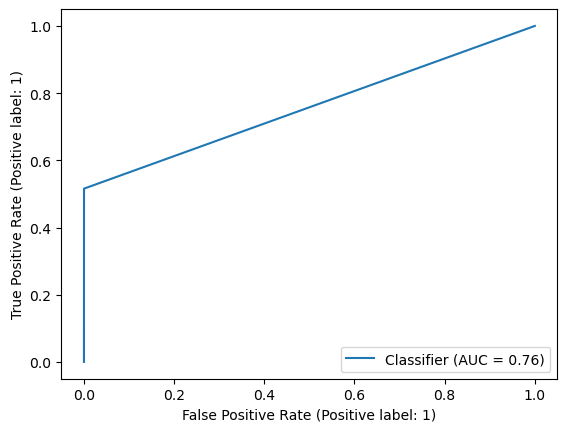

In [84]:
y_pred = best_model_log.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred)

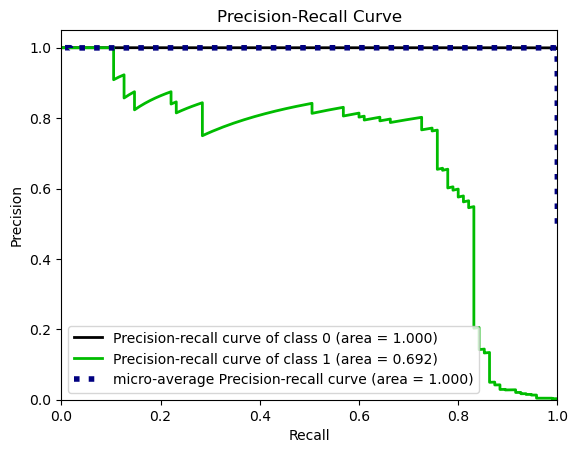

In [85]:
y_pred_proba = best_model_log.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [86]:
log_precision = precision_score(y_test, y_pred)  # Calculate precision
log_f1 = f1_score(y_test, y_pred)  # Calculate F1-score
log_recall = recall_score(y_test, y_pred) # Calculate recall

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***iii. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [484]:
train_ds = Dataset(X_train, label=y_train.reset_index(drop=True), cat_features=[])
test_ds = Dataset(X_test, label=y_test.reset_index(drop=True), cat_features=[])

In [485]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, best_model_log)

In [486]:
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_FP2G3CJYALFI5FZ6I5L1UM5ZL">Model Evaluation S…

### Logistic Regression with Unbalanced Data Techniques

***i. Model Training***

In [87]:
log= LogisticRegression(max_iter=5000, random_state= SEED, class_weight="balanced")

In [88]:
log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=101)

In [89]:
eval_metric(log, X_train, y_train, X_test, y_test)

Test_Set
[[55292  1359]
 [   11    84]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.88      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746


Train_Set
[[221380   5222]
 [    28    350]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226602
           1       0.06      0.93      0.12       378

    accuracy                           0.98    226980
   macro avg       0.53      0.95      0.55    226980
weighted avg       1.00      0.98      0.99    226980



##### cross-validation

In [90]:
log_c = LogisticRegression(max_iter=5000, random_state= SEED, class_weight="balanced")

In [91]:
scores = cross_validate(log_c, X_train, y_train, scoring=['precision','recall','f1','accuracy'], cv=5, return_train_score=True, n_jobs=-1)

In [92]:
df_scores = pd.DataFrame(scores, index = range(1,6))
df_scores.mean()[2:]

test_precision     0.061264
train_precision    0.063282
test_recall        0.902140
train_recall       0.928564
test_f1            0.114635
train_f1           0.118399
test_accuracy      0.976562
train_accuracy     0.976677
dtype: float64

##### gridsearch

In [93]:
logreg = LogisticRegression(random_state= SEED, max_iter=5000, class_weight="balanced")

In [94]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term
    'solver' : ['liblinear','lbfgs'],
}

In [95]:
log_model_grid = GridSearchCV(
    logreg,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    return_train_score=True,    
)

In [96]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, random_state=101),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             return_train_score=True, scoring='f1')

In [97]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[55379  1272]
 [   11    84]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.88      0.12        95

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746


Train_Set
[[221785   4817]
 [    31    347]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226602
           1       0.07      0.92      0.13       378

    accuracy                           0.98    226980
   macro avg       0.53      0.95      0.56    226980
weighted avg       1.00      0.98      0.99    226980



In [98]:
# Get the best parameters
best_params = log_model_grid.best_params_

# Get the best model
best_model_log_b = log_model_grid.best_estimator_

In [99]:
best_model_log_b

LogisticRegression(C=0.001, class_weight='balanced', max_iter=5000,
                   random_state=101)

In [100]:
best_params

{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}

In [101]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.126086
mean_train_score    0.128841
Name: 3, dtype: object

##### manual tuning

In [102]:
logreg_m = LogisticRegression(random_state= SEED, max_iter=5000, class_weight={0:0.5, 1: 15})

In [103]:
logreg_m.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.5, 1: 15}, max_iter=5000,
                   random_state=101)

In [104]:
eval_metric(logreg_m, X_train, y_train, X_test, y_test)

Test_Set
[[56597    54]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.58      0.80      0.68        95

    accuracy                           1.00     56746
   macro avg       0.79      0.90      0.84     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226414    188]
 [    60    318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.63      0.84      0.72       378

    accuracy                           1.00    226980
   macro avg       0.81      0.92      0.86    226980
weighted avg       1.00      1.00      1.00    226980



In [105]:
logreg_m_c = LogisticRegression(random_state= SEED, max_iter=5000, class_weight={0:0.5, 1: 15})

In [106]:
scores = cross_validate(logreg_m_c, X_train, y_train, scoring=['precision','recall','f1','accuracy'], cv=5, return_train_score=True, n_jobs=-1)

In [107]:
df_scores = pd.DataFrame(scores, index = range(1,6))
df_scores.mean()[2:]

test_precision     0.599233
train_precision    0.615507
test_recall        0.836105
train_recall       0.843263
test_f1            0.696880
train_f1           0.711363
test_accuracy      0.998788
train_accuracy     0.998858
dtype: float64

***ii.  Plot Precision and Recall Curve***


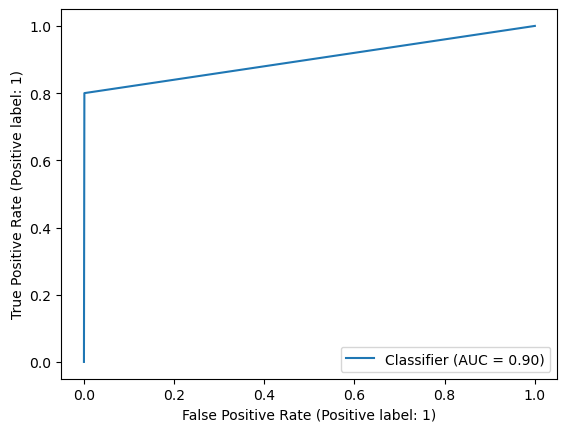

In [108]:
y_pred = logreg_m.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred)

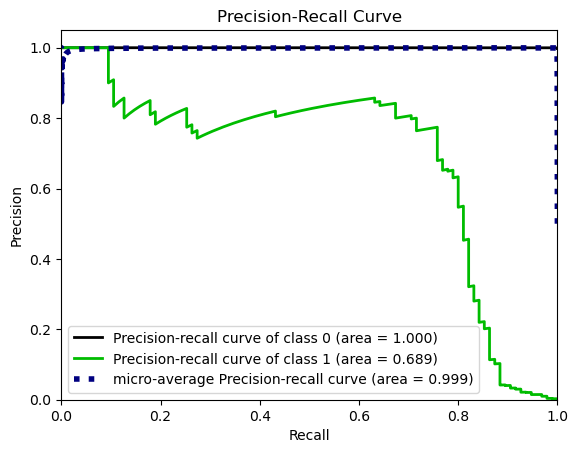

In [109]:
y_pred_proba = logreg_m.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [110]:
log_b_precision = precision_score(y_test, y_pred)  # Calculate precision
log_b_f1 = f1_score(y_test, y_pred)  # Calculate F1-score
log_b_recall = recall_score(y_test, y_pred) # Calculate recall

***iii. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [1349]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, logreg_m)

In [1350]:
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_SPQ9DHVF6TEWV8Z4WHZC8KWJ9">Model Evaluation S…

### Random Forest Classifier with Unbalanced Data Techniques
   

***i. Model Training***

In [111]:
RF_model = RandomForestClassifier(random_state=SEED, class_weight="balanced", n_jobs=-1)

In [112]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=101)

In [113]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[56647     4]
 [   27    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.72      0.81        95

    accuracy                           1.00     56746
   macro avg       0.97      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602      0]
 [     0    378]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



##### cross-validation

In [114]:
RF_model_c = RandomForestClassifier(random_state=SEED, class_weight="balanced", n_jobs=-1)

In [115]:
scores = cross_validate(RF_model_c,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision",
                                 "recall",
                                 "f1"],
                        cv = 5,
                        return_train_score=True,
                        n_jobs=-1)

In [116]:
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.999529
train_accuracy     1.000000
test_precision     0.956261
train_precision    1.000000
test_recall        0.751263
train_recall       1.000000
test_f1            0.841059
train_f1           1.000000
dtype: float64

##### gridsearch

In [117]:
RF_model_GS = RandomForestClassifier(random_state=SEED, class_weight="balanced", n_jobs=-1)

In [118]:
# Define the parameter grid
param_grid = {
    "max_features": [10, 15, "sqrt"],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 6],
}

In [120]:
grid_search = GridSearchCV(estimator=RF_model_GS, param_grid=param_grid, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)

In [121]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6],
                         'max_features': [10, 15, 'sqrt'],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='f1')

In [122]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[56590    61]
 [   18    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.56      0.81      0.66        95

    accuracy                           1.00     56746
   macro avg       0.78      0.90      0.83     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226377    225]
 [    33    345]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.61      0.91      0.73       378

    accuracy                           1.00    226980
   macro avg       0.80      0.96      0.86    226980
weighted avg       1.00      1.00      1.00    226980



In [123]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model_rf = grid_search.best_estimator_

In [124]:
best_model_rf

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=150,
                       n_jobs=-1, random_state=101)

In [125]:
best_params

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 150}

In [126]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.735543
mean_train_score    0.785037
Name: 26, dtype: object

##### manual tuning

In [127]:
RF_model_m = RandomForestClassifier(random_state=SEED, class_weight={0:0.5, 1:180}, n_jobs=-1, max_depth=2, max_features=4)

In [128]:
RF_model_m.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5, 1: 180}, max_depth=2,
                       max_features=4, n_jobs=-1, random_state=101)

In [129]:
eval_metric(RF_model_m, X_train, y_train, X_test, y_test)

Test_Set
[[56623    28]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.73      0.80      0.76        95

    accuracy                           1.00     56746
   macro avg       0.87      0.90      0.88     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226462    140]
 [    60    318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.69      0.84      0.76       378

    accuracy                           1.00    226980
   macro avg       0.85      0.92      0.88    226980
weighted avg       1.00      1.00      1.00    226980



In [130]:
pd.DataFrame(RF_model_m.feature_importances_, X.columns).sort_values(by=[0], ascending=False)

,0
V10,0.147154
V14,0.145011
V4,0.138586
V12,0.112007
V16,0.079859
V7,0.065824
V11,0.056667
V17,0.047637
V3,0.043087
V2,0.037262


In [131]:
RF_model_m_c = RandomForestClassifier(random_state=SEED, class_weight={0:0.5, 1:180}, n_jobs=-1, max_depth=2, max_features=4)

In [132]:
scores = cross_validate(RF_model_m_c,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision",
                                 "recall",
                                 "f1"],
                        cv = 5,
                        return_train_score=True,
                        n_jobs=-1)

In [133]:
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.999159
train_accuracy     0.999165
test_precision     0.709880
train_precision    0.710952
test_recall        0.838737
train_recall       0.843261
test_f1            0.768262
train_f1           0.771196
dtype: float64

***ii. Plot Precision and Recall Curve***


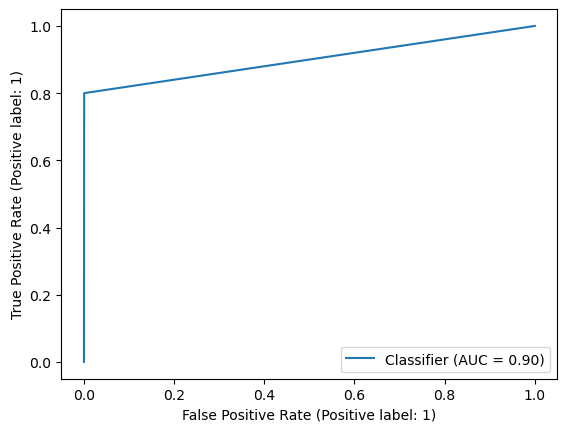

In [134]:
y_pred = RF_model_m.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred)

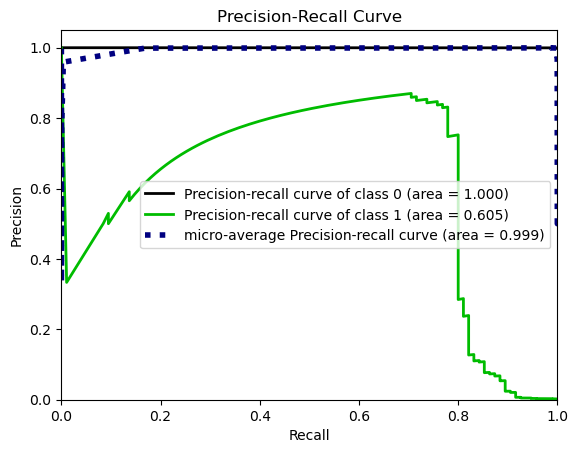

In [135]:
y_pred_proba = RF_model_m.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [136]:
rf_precision = precision_score(y_test, y_pred)  # Calculate precision
rf_f1 = f1_score(y_test, y_pred)  # Calculate F1-score
rf_recall = recall_score(y_test, y_pred) # Calculate recall

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [965]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, RF_model_m)

In [966]:
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_01B7LUPK9PAUXH9LBR3T7OYTX">Model Evaluation S…

### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

In [137]:
imbalance_ratio = sum(y_train == 0) / sum(y_train == 1)

In [138]:
imbalance_ratio

599.4761904761905

In [139]:
xgboost_model = XGBClassifier(random_state=SEED, scale_pos_weight=imbalance_ratio)

In [140]:
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=101, ...)

In [141]:
eval_metric(xgboost_model, X_train, y_train, X_test, y_test)

Test_Set
[[56643     8]
 [   21    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.78      0.84        95

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602      0]
 [     0    378]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



##### cross-validation

In [142]:
model = XGBClassifier(random_state=SEED, scale_pos_weight=imbalance_ratio)

In [143]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy',
                                 'precision',
                                 'recall',
                                 'f1'],
                        cv = 5,
                        return_train_score=True,
                        n_jobs=-1)

In [144]:
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.999559
train_accuracy     1.000000
test_precision     0.903437
train_precision    1.000000
test_recall        0.825509
train_recall       1.000000
test_f1            0.861555
train_f1           1.000000
dtype: float64

##### gridsearch

In [145]:
xgb_model = XGBClassifier(random_state=SEED, scale_pos_weight=imbalance_ratio)

In [146]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 6],
}

In [147]:
xgb_grid = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        cv=5,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True)

In [148]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=101, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 6],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='f1')

In [149]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[56642     9]
 [   21    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.78      0.83        95

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602      0]
 [     0    378]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



In [150]:
# Get the best parameters and best estimator
best_params = xgb_grid.best_params_
best_model_xgb = xgb_grid.best_estimator_

In [151]:
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=101, ...)

In [152]:
best_params

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 150}

In [153]:
pd.DataFrame(xgb_grid.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.862329
mean_train_score         1.0
Name: 26, dtype: object

##### manual tuning

In [154]:
xgb_model_m = XGBClassifier(random_state=SEED, scale_pos_weight=50, max_depth=4 , learning_rate= 0.01, subsample = 0.5, tree_method = "approx")

In [155]:
xgb_model_m.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=101, ...)

In [156]:
eval_metric(xgb_model_m, X_train, y_train, X_test, y_test)

Test_Set
[[56632    19]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.80      0.80      0.80        95

    accuracy                           1.00     56746
   macro avg       0.90      0.90      0.90     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226529     73]
 [    56    322]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.82      0.85      0.83       378

    accuracy                           1.00    226980
   macro avg       0.91      0.93      0.92    226980
weighted avg       1.00      1.00      1.00    226980



In [157]:
pd.DataFrame(xgb_model_m.feature_importances_, X.columns).sort_values(by=[0], ascending=False)

,0
V14,0.687395
V17,0.068155
V8,0.023884
V10,0.021882
V12,0.018995
V4,0.018126
V15,0.018089
Amount,0.015700
V19,0.015696
V25,0.013184


In [158]:
xgb_model_m_c = XGBClassifier(random_state=SEED, scale_pos_weight=50, max_depth=4 , learning_rate= 0.01, subsample = 0.5, tree_method = "approx")

In [159]:
scores = cross_validate(xgb_model_m_c,
                        X_train,
                        y_train,
                        scoring=['accuracy',
                                 'precision',
                                 'recall',
                                 'f1'],
                        cv = 5,
                        return_train_score=True,
                        n_jobs=-1)

In [160]:
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.999330
train_accuracy     0.999421
test_precision     0.785711
train_precision    0.810295
test_recall        0.825474
train_recall       0.851859
test_f1            0.804344
train_f1           0.830473
dtype: float64

***iii. Plot Precision and Recall Curve***


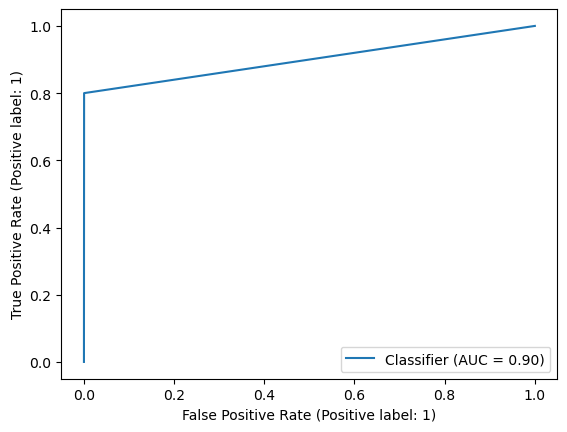

In [161]:
y_pred = xgb_model_m.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred)

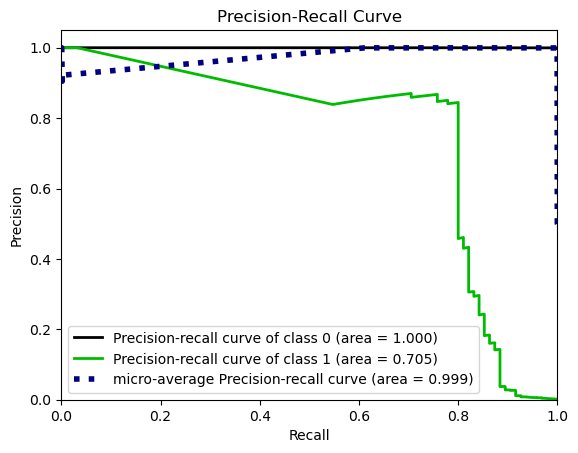

In [162]:
y_pred_proba = xgb_model_m.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [163]:
xgb_precision = precision_score(y_test, y_pred)  # Calculate precision
xgb_f1 = f1_score(y_test, y_pred)  # Calculate F1-score
xgb_recall = recall_score(y_test, y_pred) # Calculate recall

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [397]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb_model_m)

In [398]:
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_DT5Q33FC254ZS8016B0VAJZTU">Model Evaluation S…

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Define Model***

In [164]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train_d),
                                                  y=y_train_d)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5008329563883893, 1: 300.63576158940396}

In [165]:
model = Sequential()
model.add(Dense(128,activation= 'relu'))
model.add(Dense(64,activation= 'relu'))
model.add(Dense(32,activation= 'relu'))
model.add(Dense(1, activation='sigmoid'))


***iii. Compile Model***

In [166]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall", "Precision"])

***iv. Fit Model***

In [167]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=50,
                           restore_best_weights=True)

In [168]:
model.fit(x=X_train_d,
          y=y_train_d,
          validation_data=(X_val_d, y_val_d),
          batch_size=8192,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight={0: 1, 1: 5}
          )

Epoch 1/200
23/23 [==============================] - 2s 14ms/step - loss: 0.2838 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0440 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.0417 - recall: 0.1523 - precision: 0.8214 - val_loss: 0.0080 - val_recall: 0.6842 - val_precision: 0.8525
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.0182 - recall: 0.7384 - precision: 0.8479 - val_loss: 0.0057 - val_recall: 0.8158 - val_precision: 0.8493
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.0147 - recall: 0.7881 - precision: 0.8322 - val_loss: 0.0053 - val_recall: 0.8289 - val_precision: 0.8514
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.0129 - recall: 0.7914 - precision: 0.8270 - val_loss: 0.0048 - val_recall: 0.8289 - val_precision: 0.8514
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.011

***v. Prediction and Model Evaluating***

In [169]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


<Axes: >

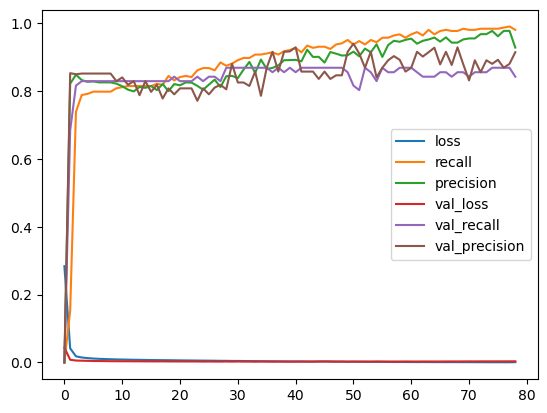

In [170]:
loss_df = pd.DataFrame(model.history.history) 
loss_df.plot()

In [171]:
model.evaluate(X_train_d, y_train_d)

5675/5675 [==============================] - 9s 2ms/step - loss: 0.0021 - recall: 0.8940 - precision: 0.8333


[0.0020841392688453197, 0.8940397500991821, 0.8333333134651184]

In [172]:
eval_metric_d(model, X_train_d, y_train_d, X_test_d, y_test_d)

1774/1774 [==============================] - 1s 720us/step
Test_Set
[[56629    22]
 [   21    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.77      0.78      0.77        95

    accuracy                           1.00     56746
   macro avg       0.89      0.89      0.89     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[181228     54]
 [    32    270]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    181282
           1       0.83      0.89      0.86       302

    accuracy                           1.00    181584
   macro avg       0.92      0.95      0.93    181584
weighted avg       1.00      1.00      1.00    181584



***vi. Plot Precision and Recall Curve***

1774/1774 [==============================] - 2s 840us/step


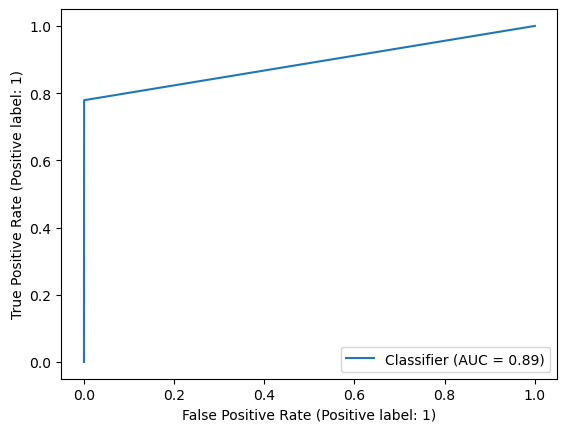

In [173]:
y_pred = model.predict(X_test_d) >= 0.5
RocCurveDisplay.from_predictions(y_test_d, y_pred)

1774/1774 [==============================] - 1s 809us/step


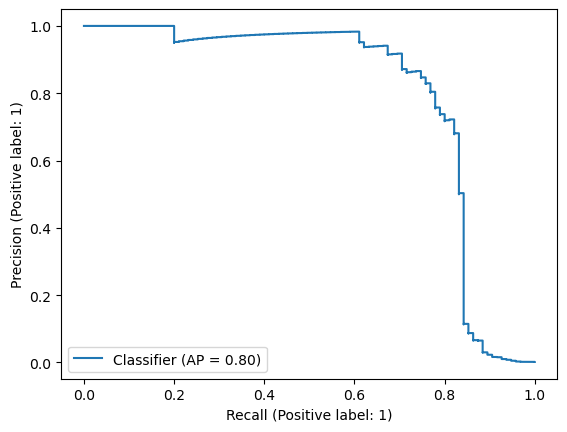

In [174]:
y_pred_proba = model.predict(X_test_d)
PrecisionRecallDisplay.from_predictions(y_test_d, y_pred_proba)

In [175]:
dl_precision = precision_score(y_test, y_pred)  # Calculate precision
dl_f1 = f1_score(y_test, y_pred)  # Calculate F1-score
dl_recall = recall_score(y_test, y_pred) # Calculate recall

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [389]:
class KerasModelWrapper:
    def __init__(self, model):
        self.model = model
    def fit(self, X, y, X_val, y_val):
        opt = Adam(lr=0.001)
        self.model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall", "Precision"])
        early_stop = EarlyStopping(monitor="val_recall",mode="max",verbose=1,patience=50,restore_best_weights=True)
        self.model.fit(X, y, validation_data=(X_val, y_val), batch_size=8192,epochs=200,verbose=1,callbacks=[early_stop],class_weight={0: 1, 1: 5})
    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")
    def predict_proba(self, X):
        return np.array(list(zip(1 - self.model.predict(X).flatten(), self.model.predict(X).flatten())))

In [390]:
model2 = Sequential()
model2.add(Dense(128,activation= 'relu'))
model2.add(Dense(64,activation= 'relu'))
model2.add(Dense(32,activation= 'relu'))
model2.add(Dense(1, activation='sigmoid'))

In [391]:
wrapped_model = KerasModelWrapper(model2)

In [392]:
wrapped_model.fit(X_train_d, y_train_d, X_val_d, y_val_d)

Epoch 1/200
23/23 [==============================] - 1s 13ms/step - loss: 0.2591 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0299 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.0325 - recall: 0.4834 - precision: 0.8111 - val_loss: 0.0080 - val_recall: 0.6974 - val_precision: 0.8281
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.0186 - recall: 0.7715 - precision: 0.8233 - val_loss: 0.0059 - val_recall: 0.8158 - val_precision: 0.8493
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.0152 - recall: 0.7881 - precision: 0.8235 - val_loss: 0.0055 - val_recall: 0.8158 - val_precision: 0.8493
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.0133 - recall: 0.7914 - precision: 0.8241 - val_loss: 0.0050 - val_recall: 0.8289 - val_precision: 0.8514
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.012

In [347]:
eval_metric(wrapped_model, X_train_d, y_train_d, X_test_d, y_test_d)

1774/1774 [==============================] - 2s 851us/step
Test_Set
[[56623    28]
 [   17    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.74      0.82      0.78        95

    accuracy                           1.00     56746
   macro avg       0.87      0.91      0.89     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[181219     63]
 [    27    275]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    181282
           1       0.81      0.91      0.86       302

    accuracy                           1.00    181584
   macro avg       0.91      0.96      0.93    181584
weighted avg       1.00      1.00      1.00    181584



In [338]:
train_ds = Dataset(X_train_d, label=y_train_d.reset_index(drop=True), cat_features=[])
test_ds = Dataset(X_test_d, label=y_test_d.reset_index(drop=True), cat_features=[])

In [394]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, wrapped_model, model_classes=[0,1])

Model Evaluation Suite: 
 
 
 
 0/11 [Time: 00:00]

1/1 [==============================] - 0s 11ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


313/313 [==============================] - 0s 833us/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 323 seconds, but timeout was configured to 120 seconds


32/32 [==============================] - 0s 856us/step


In [395]:
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_8BCAE947GY20J80YKO1SR7P4B">Model Evaluation S…

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

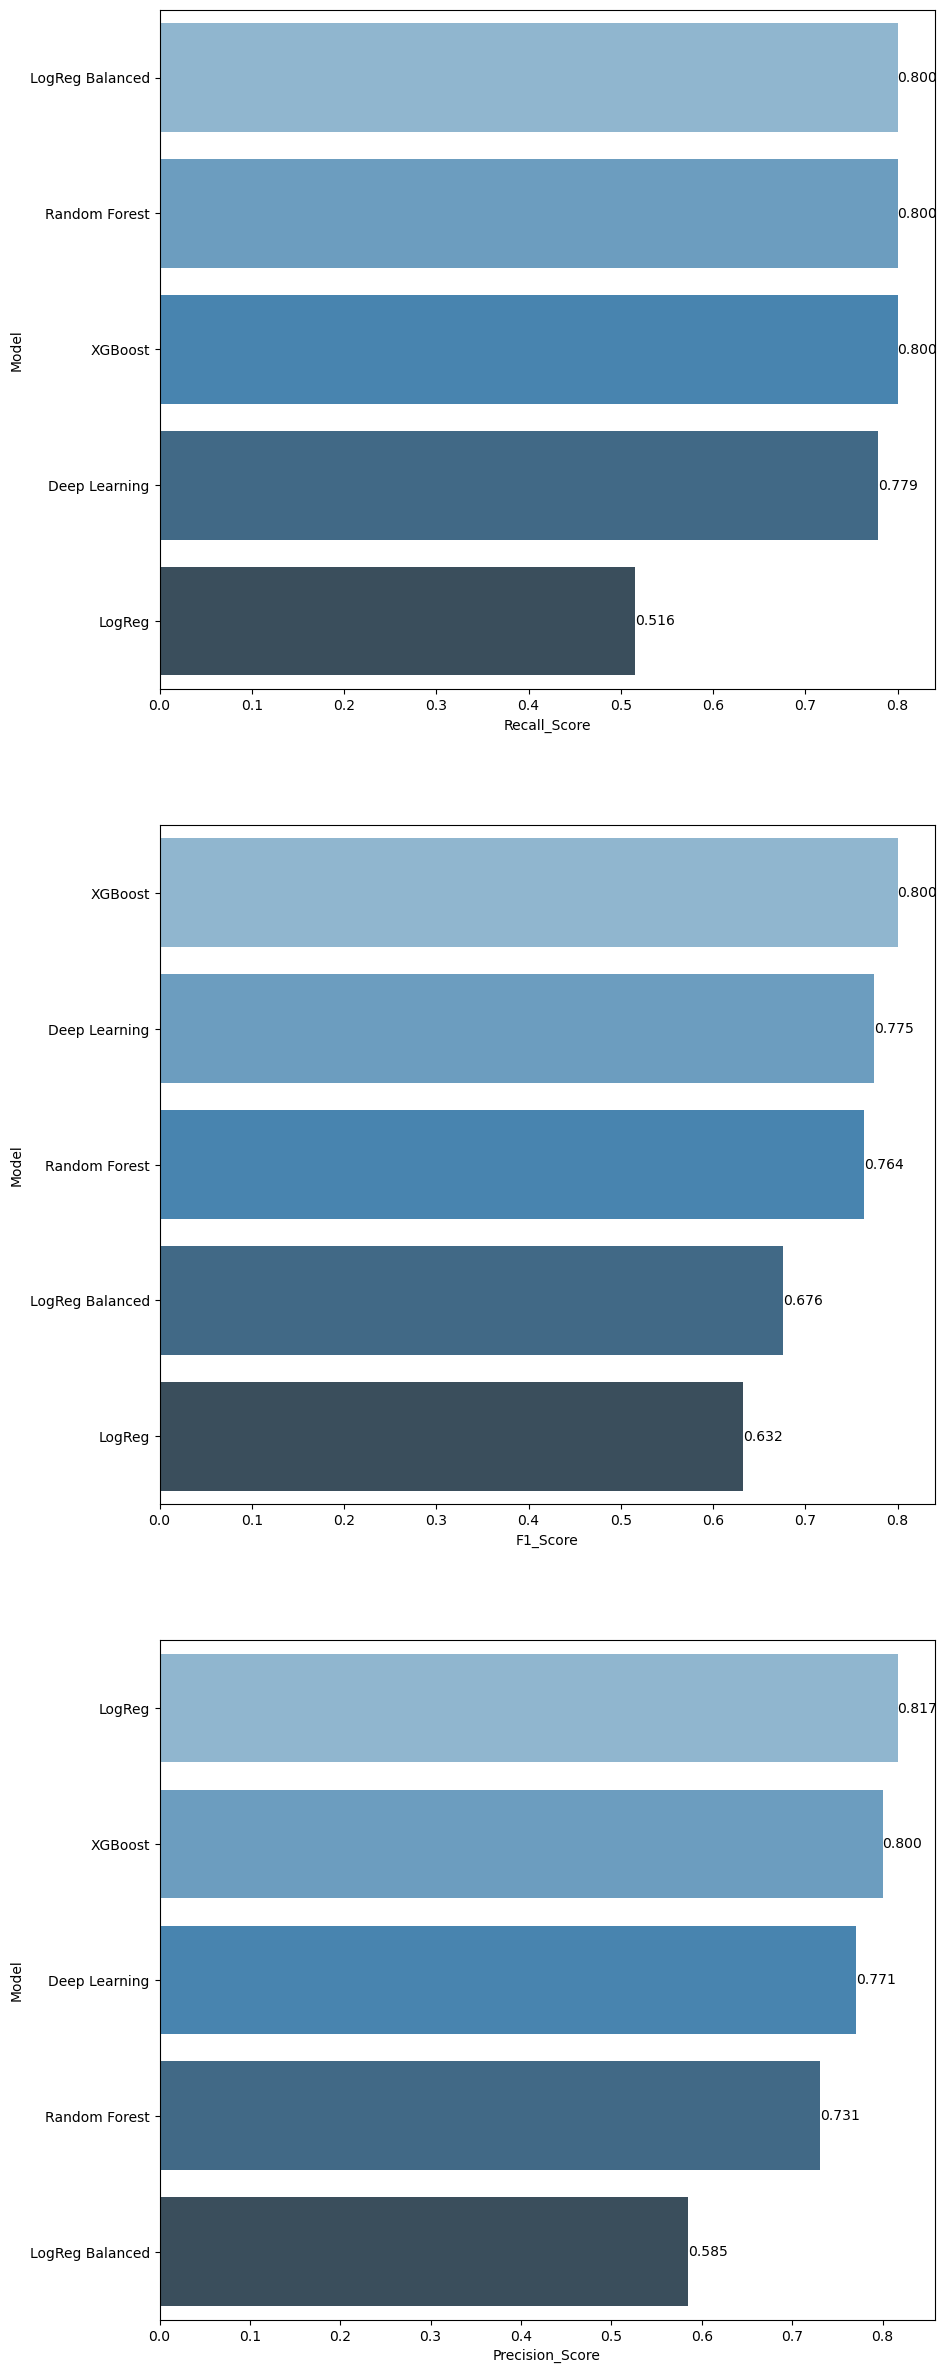

In [176]:
compare = pd.DataFrame({"Model": ["LogReg", "LogReg Balanced", "Random Forest", "XGBoost", "Deep Learning"],

                        "F1_Score": [log_f1, log_b_f1, rf_f1, xgb_f1, dl_f1],

                        "Recall_Score": [log_recall, log_b_recall, rf_recall, xgb_recall, dl_recall],

                        "Precision_Score": [log_precision, log_b_precision, rf_precision, xgb_precision, dl_precision]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


In [423]:
final_xgb = XGBClassifier(random_state=SEED, scale_pos_weight=50, max_depth=4 , learning_rate= 0.01, subsample = 0.5, tree_method = "approx")

In [424]:
final_model = Pipeline([("scaler", StandardScaler()), ("XGB_Model", final_xgb)])

In [425]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB_Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=101, ...))])

In [426]:
y_pred = final_model.predict(X)

print(confusion_matrix(y, y_pred))
print("-------------------------------------------------------")
print(classification_report(y, y_pred))

[[283148    105]
 [    73    400]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.79      0.85      0.82       473

    accuracy                           1.00    283726
   macro avg       0.90      0.92      0.91    283726
weighted avg       1.00      1.00      1.00    283726



In [416]:
pickle.dump(final_model, open("my_model", "wb"))

##### with features selection

In [430]:
feature_selection = pd.DataFrame(xgb_model_m.feature_importances_, X.columns).sort_values(by=[0], ascending=False)

In [431]:
feature_selection

,0
V14,0.687395
V17,0.068155
V8,0.023884
V10,0.021882
V12,0.018995
V4,0.018126
V15,0.018089
Amount,0.015700
V19,0.015696
V25,0.013184


In [432]:
feature_selection.index[:11]

Index(['V14', 'V17', 'V8', 'V10', 'V12', 'V4', 'V15', 'Amount', 'V19', 'V25', 'V13'], dtype='object')

In [436]:
X_f = X[feature_selection.index[:11]]

In [453]:
df[feature_selection.index[:11]].describe()

,V14,V17,V8,V10,V12,V4,V15,Amount,V19,V25,V13
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.000252,0.000170,-0.000854,-0.001441,-0.000715,-0.002966,0.001043,88.472687,-0.000264,-0.000232,0.000603
std,0.952215,0.842507,1.179054,1.076407,0.994674,1.414184,0.914894,250.399437,0.813379,0.521220,0.995430
min,-19.214325,-25.162799,-73.216718,-24.588262,-18.683715,-5.683171,-4.498945,0.000000,-7.213527,-10.295397,-5.791881
25%,-0.425732,-0.483928,-0.208828,-0.535578,-0.406198,-0.850134,-0.581452,5.600000,-0.456289,-0.317485,-0.647862
50%,0.050209,-0.065867,0.021898,-0.093237,0.139072,-0.022248,0.049299,22.000000,0.003367,0.016278,-0.012927
75%,0.492336,0.398972,0.325704,0.453619,0.616976,0.739647,0.650104,77.510000,0.458508,0.350667,0.663178
max,10.526766,9.253526,20.007208,23.745136,7.848392,16.875344,8.877742,25691.160000,5.591971,7.519589,7.126883


In [446]:
final_xgb_f = XGBClassifier(random_state=SEED, scale_pos_weight=50, max_depth=4 , learning_rate= 0.01, subsample = 0.5, tree_method = "approx")

In [447]:
final_model_f = Pipeline([("scaler", StandardScaler()), ("XGB_Model", final_xgb_f)])

In [448]:
final_model_f.fit(X_f, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB_Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=101, ...))])

In [449]:
y_pred = final_model_f.predict(X_f)

print(confusion_matrix(y, y_pred))
print("-------------------------------------------------------")
print(classification_report(y, y_pred))

[[283109    144]
 [    74    399]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.73      0.84      0.79       473

    accuracy                           1.00    283726
   macro avg       0.87      0.92      0.89    283726
weighted avg       1.00      1.00      1.00    283726



In [450]:
pickle.dump(final_model_f, open("my_model_f", "wb"))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___